## **$Informe$ $seminario$ $programación$**

#### $Presenta:$
- Alison Fernanda Gamba Casas
- Jose Dario Hernandez Caro

#### $Objetivo$ $general$ $del$ $Informe$
<p style="text-align: justify;">
- Entregar un informe en Jupyter Notebook que analice los secuestros en Colombia a partir del dataset oficial publicado en datos.gov.co, integrando otras fuentes de información para construir tasas, comparativos y posibles explicaciones del fenómeno.
</p>

#### $1)$ $Estructura$ $del$ $Informe$

- Presentación del tema: el secuestro en Colombia.
- Justificación del análisis.
- Objetivos del informe (especificos).

- PRESENTACIÓN DEL TEMA: EL SECUESTRO EN COLOMBIA

<p style="text-align: justify;">
El secuestro es uno de los delitos más graves que afectan la libertad y la dignidad humana, y ha tenido un impacto significativo en la historia reciente de Colombia. Durante décadas, diversos actores armados ilegales han utilizado el secuestro como un instrumento de presión política, financiera y territorial. Este fenómeno no solo ha dejado profundas secuelas en las víctimas y sus familias, sino que también ha condicionado el desarrollo social, económico y político de muchas regiones del país. A pesar de que en los últimos años las cifras oficiales muestran una disminución en la incidencia del secuestro, este delito continúa presentándose en varias zonas del territorio nacional, especialmente en áreas con presencia de economías ilícitas, conflicto social o débil presencia institucional. En este informe, se analiza el comportamiento del secuestro desde una perspectiva cuantitativa, con base en datos oficiales, buscando identificar patrones, correlaciones y diferencias entre las regiones. Esta exploración resulta clave para entender no solo la magnitud del problema, sino también, eventualmente para proponer mejores políticas públicas que permitan su prevención y atención efectiva. En este sentido, el análisis del secuestro se convierte en una herramienta fundamental para la toma de decisiones informadas en seguridad ciudadana, derechos humanos y desarrollo territorial, que de momento es presentamos con fines estrictamente académicos.
</p>

- IMPORTACIÓN DE LIBRERIAS

In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx
import warnings
pd.options.mode.chained_assignment = None 
from sklearn.cluster import DBSCAN
import re
from collections import defaultdict
import calplot



- ARCHIVO PRINCIPAL DF

In [3]:

DF=pd.read_json('https://www.datos.gov.co/resource/d7zw-hpf4.json?$limit=1000000&')
DF


,fecha_hecho,cod_depto,departamento,cod_muni,municipio,tipo_delito,cantidad
0,1996-01-01T00:00:00.000,5,ANTIOQUIA,5042,SANTAFE DE ANTIOQUIA,SECUESTRO SIMPLE,1
1,1996-01-01T00:00:00.000,25,CUNDINAMARCA,25290,FUSAGASUGA,SECUESTRO EXTORSIVO,1
2,1996-01-02T00:00:00.000,5,ANTIOQUIA,5038,ANGOSTURA,SECUESTRO EXTORSIVO,1
3,1996-01-02T00:00:00.000,68,SANTANDER,68001,BUCARAMANGA,SECUESTRO EXTORSIVO,1
4,1996-01-02T00:00:00.000,5,ANTIOQUIA,5088,BELLO,SECUESTRO EXTORSIVO,1
...,...,...,...,...,...,...,...
28015,2025-04-16T00:00:00.000,5,ANTIOQUIA,5440,MARINILLA,SECUESTRO EXTORSIVO,1
28016,2025-04-16T00:00:00.000,5,ANTIOQUIA,5440,MARINILLA,SECUESTRO EXTORSIVO,1
28017,2025-04-16T00:00:00.000,19,CAUCA,19001,POPAYAN,SECUESTRO EXTORSIVO,1
28018,2025-04-16T00:00:00.000,19,CAUCA,19001,POPAYAN,SECUESTRO EXTORSIVO,1


In [4]:
DF['fecha_hecho'] = pd.to_datetime(DF['fecha_hecho'], errors='coerce')
DF['ano'] = DF['fecha_hecho'].dt.year

In [5]:
DF['mes'] = DF['fecha_hecho'].dt.month


In [6]:
# Convertir la columna de fecha a datetime
DF['fecha_hecho'] = pd.to_datetime(DF['fecha_hecho'], errors='coerce')

# Extraer año y mes en columnas separadas
DF['ano'] = DF['fecha_hecho'].dt.year
DF['mes'] = DF['fecha_hecho'].dt.month


In [7]:

DF['cod_muni'] = DF['cod_muni'].astype(str).str.zfill(5)

In [8]:
DF['key'] = DF['cod_muni'] + '-' + DF['ano'].astype(str)

In [9]:
print("Total de keys únicas:", DF['key'].nunique())
print("Total de filas:", DF.shape[0])


Total de keys únicas: 6600
Total de filas: 28020


In [10]:
# Asegurarse de que 'cantidad' sea numérica
DF['cantidad'] = pd.to_numeric(DF['cantidad'], errors='coerce')

# Agrupar por KEY, municipio y departamento, sumando cantidad
DF_final = DF.groupby(['key', 'municipio', 'departamento', 'tipo_delito', 'mes', 'ano', 'fecha_hecho'])['cantidad'].sum().reset_index()


In [12]:
# Pivotear tipo_delito para que sea columnas
DF_pivot = DF_final.pivot_table(
    index=['key', 'municipio', 'departamento', 'mes', 'ano', 'fecha_hecho'],
    columns='tipo_delito',
    values='cantidad',
    fill_value=0
).reset_index()


In [13]:
DF_pivot

tipo_delito,key,municipio,departamento,mes,ano,fecha_hecho,SECUESTRO EXTORSIVO,SECUESTRO SIMPLE
0,05001-1996,MEDELLIN,ANTIOQUIA,1,1996,1996-01-06,1.0,0.0
1,05001-1996,MEDELLIN,ANTIOQUIA,1,1996,1996-01-08,3.0,0.0
2,05001-1996,MEDELLIN,ANTIOQUIA,1,1996,1996-01-17,4.0,0.0
3,05001-1996,MEDELLIN,ANTIOQUIA,1,1996,1996-01-26,2.0,0.0
4,05001-1996,MEDELLIN,ANTIOQUIA,1,1996,1996-01-28,2.0,0.0
...,...,...,...,...,...,...,...,...
18417,99773-2003,CUMARIBO,VICHADA,2,2003,2003-02-19,3.0,0.0
18418,99773-2005,CUMARIBO,VICHADA,6,2005,2005-06-25,0.0,1.0
18419,99773-2006,CUMARIBO,VICHADA,9,2006,2006-09-11,0.0,1.0
18420,99773-2011,CUMARIBO,VICHADA,3,2011,2011-03-08,1.0,0.0


In [14]:
print("Total de keys únicas:", DF_pivot['key'].nunique())
print("Total de filas:", DF_pivot.shape[0])


Total de keys únicas: 6600
Total de filas: 18422


In [15]:
DF_pivot[DF_pivot.isna().any(axis=1)]


tipo_delito,key,municipio,departamento,mes,ano,fecha_hecho,SECUESTRO EXTORSIVO,SECUESTRO SIMPLE


In [16]:
DF_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18422 entries, 0 to 18421
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   key                  18422 non-null  object        
 1   municipio            18422 non-null  object        
 2   departamento         18422 non-null  object        
 3   mes                  18422 non-null  int32         
 4   ano                  18422 non-null  int32         
 5   fecha_hecho          18422 non-null  datetime64[ns]
 6   SECUESTRO EXTORSIVO  18422 non-null  float64       
 7   SECUESTRO SIMPLE     18422 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(3)
memory usage: 1007.6+ KB


In [17]:
DF_pivot.describe()

tipo_delito,mes,ano,fecha_hecho,SECUESTRO EXTORSIVO,SECUESTRO SIMPLE
count,18422.000000,18422.000000,18422,18422.000000,18422.000000
mean,6.273423,2003.587775,2004-01-25 01:16:31.553577344,0.972261,0.551840
min,1.000000,1996.000000,1996-01-01 00:00:00,0.000000,0.000000
25%,3.000000,1999.000000,1999-07-31 00:00:00,0.000000,0.000000
50%,6.000000,2001.000000,2001-12-25 12:00:00,1.000000,0.000000
75%,9.000000,2005.000000,2005-10-20 00:00:00,1.000000,1.000000
max,12.000000,2025.000000,2025-04-21 00:00:00,156.000000,64.000000
std,3.383603,6.789968,NaN,1.923752,1.355252


In [18]:
DF_pivot['TOTAL SECUESTROS'] = DF_pivot['SECUESTRO SIMPLE'] + DF_pivot['SECUESTRO EXTORSIVO']


In [19]:
# Top 10 municipios
top10_municipios = (
    DF_pivot.groupby('municipio')['TOTAL SECUESTROS']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Top 10 departamentos
top10_departamentos = (
    DF_pivot.groupby('departamento')['TOTAL SECUESTROS']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filtrar municipios
df_top_mun = DF_pivot[DF_pivot['municipio'].isin(top10_municipios)]

# Filtrar departamentos
df_top_dep = DF_pivot[DF_pivot['departamento'].isin(top10_departamentos)]


In [20]:
df_top_mun.describe()



tipo_delito,mes,ano,fecha_hecho,SECUESTRO EXTORSIVO,SECUESTRO SIMPLE,TOTAL SECUESTROS
count,4159.000000,4159.000000,4159,4159.000000,4159.000000,4159.000000
mean,6.293580,2003.870642,2004-05-08 02:56:34.854532224,0.897091,0.578745,1.475836
min,1.000000,1996.000000,1996-01-02 00:00:00,0.000000,0.000000,1.000000
25%,3.000000,1999.000000,1999-07-06 12:00:00,0.000000,0.000000,1.000000
50%,6.000000,2002.000000,2002-05-02 00:00:00,1.000000,0.000000,1.000000
75%,9.000000,2006.000000,2006-06-02 00:00:00,1.000000,1.000000,1.000000
max,12.000000,2025.000000,2025-04-21 00:00:00,156.000000,38.000000,156.000000
std,3.367735,7.008557,NaN,2.788779,1.364002,3.106546


In [21]:
df_top_dep.describe()

tipo_delito,mes,ano,fecha_hecho,SECUESTRO EXTORSIVO,SECUESTRO SIMPLE,TOTAL SECUESTROS
count,12020.000000,12020.000000,12020,12020.000000,12020.000000,12020.000000
mean,6.287854,2003.558819,2004-01-14 22:51:28.452579072,0.942928,0.567304,1.510233
min,1.000000,1996.000000,1996-01-01 00:00:00,0.000000,0.000000,1.000000
25%,3.000000,1999.000000,1999-07-16 00:00:00,0.000000,0.000000,1.000000
50%,6.000000,2001.000000,2001-11-16 00:00:00,1.000000,0.000000,1.000000
75%,9.000000,2005.000000,2005-08-25 06:00:00,1.000000,1.000000,1.000000
max,12.000000,2025.000000,2025-04-21 00:00:00,156.000000,64.000000,156.000000
std,3.389539,6.864620,NaN,1.950397,1.443922,2.341360


- GRAFICA

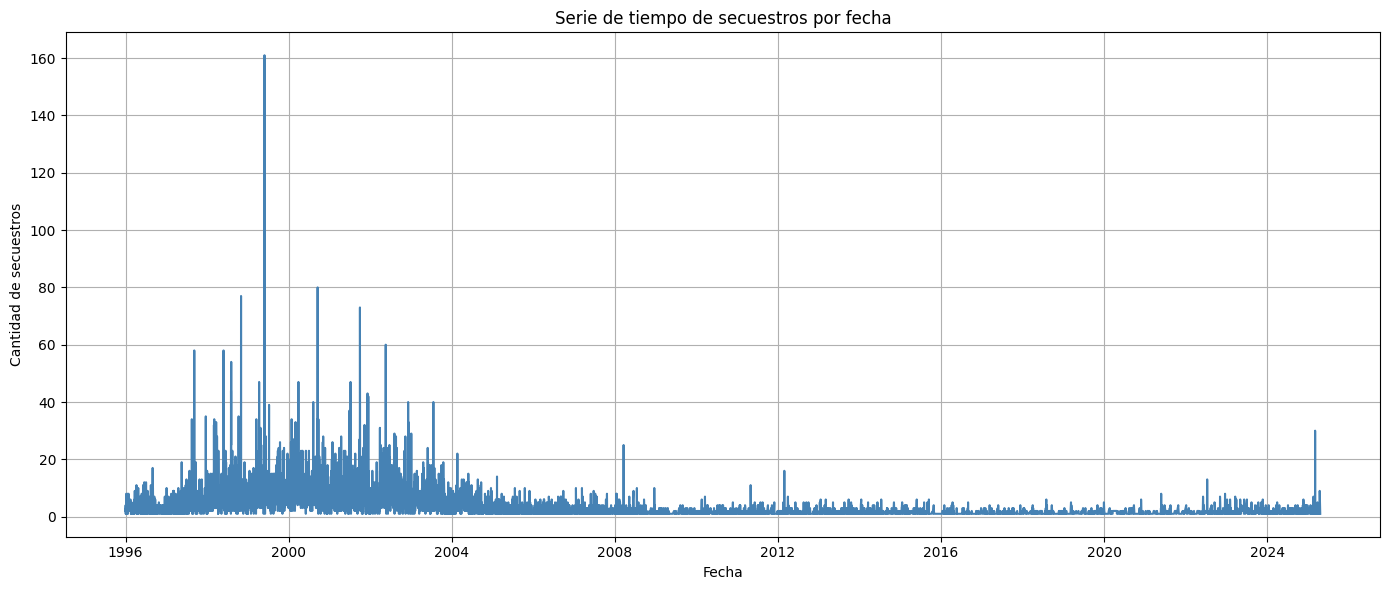

In [22]:
DF['fecha_hecho'] = pd.to_datetime(DF['fecha_hecho'], errors='coerce')
df_tiempo = DF.groupby('fecha_hecho')['cantidad'].sum().reset_index()



plt.figure(figsize=(14, 6))
plt.plot(df_tiempo['fecha_hecho'], df_tiempo['cantidad'], color='steelblue')
plt.title('Serie de tiempo de secuestros por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de secuestros')
plt.grid(True)
plt.tight_layout()
plt.show()


$Analisis$

<p style="text-align: justify;">
Esta gráfica nos muestra cómo ha cambiado el número de secuestros a lo largo del tiempo. Podemos ver que, desde 1996 hasta aproximadamente el 2004, hubo un pico muy alto de secuestros, alcanzando cifras superiores a 160 en algunos momentos. Después de ese periodo, entre 2004 y 2008, los secuestros empezaron a disminuir considerablemente. A partir de 2008 en adelante, la cantidad de secuestros se ha mantenido en niveles mucho más bajos y estables, con algunas pequeñas fluctuaciones, pero sin volver a los picos del inicio. Esto indica una reducción drástica y sostenida de los secuestros en los últimos años, lo cual denota las epocas criticas por narcoterrorismo y crecimiento de los grupos armados ilegales.
</p>

In [24]:
# Agrupar por año y mes, sumando los secuestros
df_mensual = DF_pivot.groupby(['ano', 'mes'])[['SECUESTRO EXTORSIVO', 'SECUESTRO SIMPLE']].sum().reset_index()

# Crear columna de fecha (año-mes) usando el primer día del mes
df_mensual['fecha'] = pd.to_datetime(
    df_mensual.rename(columns={'ano': 'year', 'mes': 'month'})[['year', 'month']].assign(day=1)
)


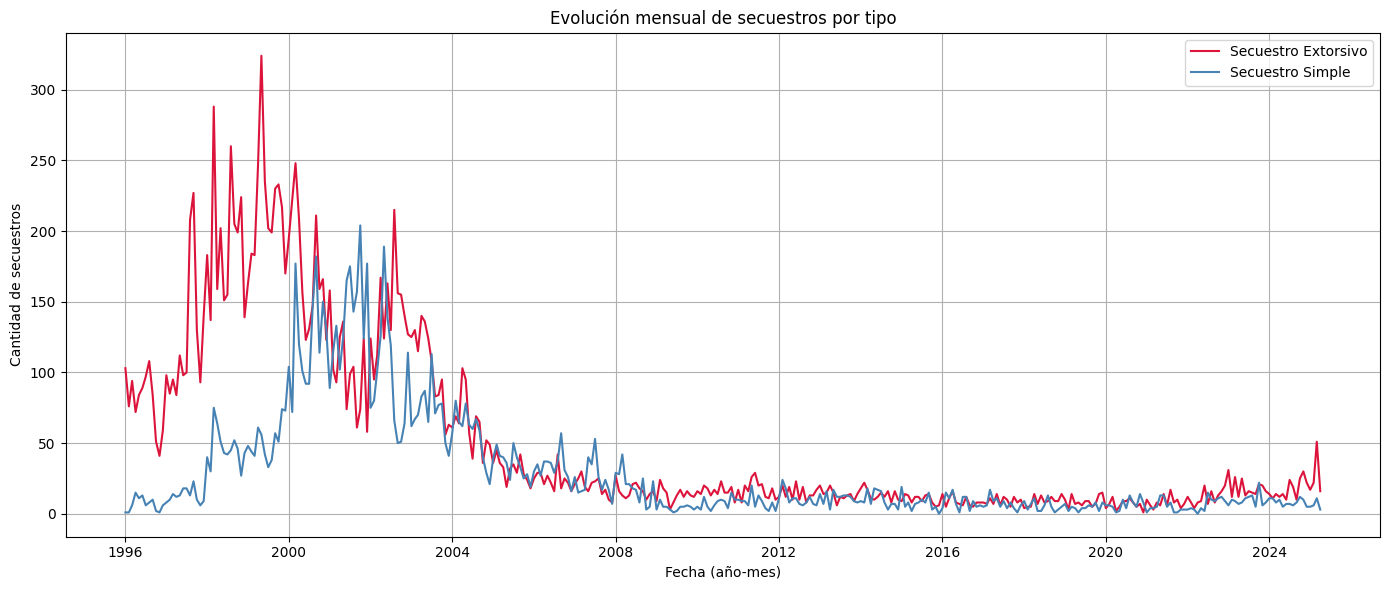

In [25]:
# Crear columna 'fecha' usando columnas 'ano' y 'mes', asignando día = 1
df_mensual['fecha'] = pd.to_datetime(
    df_mensual.rename(columns={'ano': 'year', 'mes': 'month'})[['year', 'month']].assign(day=1)
)


plt.figure(figsize=(14, 6))

plt.plot(df_mensual['fecha'], df_mensual['SECUESTRO EXTORSIVO'], label='Secuestro Extorsivo', color='crimson')
plt.plot(df_mensual['fecha'], df_mensual['SECUESTRO SIMPLE'], label='Secuestro Simple', color='steelblue')

plt.title('Evolución mensual de secuestros por tipo')
plt.xlabel('Fecha (año-mes)')
plt.ylabel('Cantidad de secuestros')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


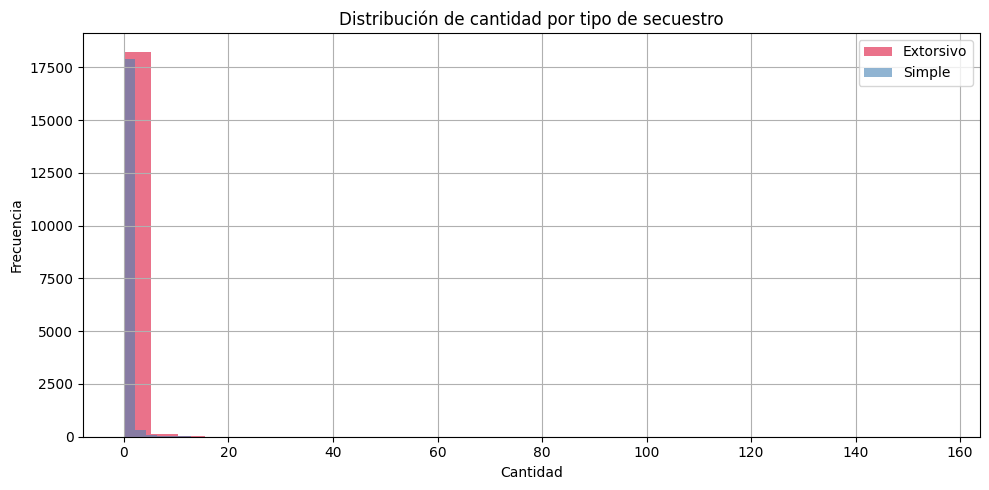

In [26]:
plt.figure(figsize=(10, 5))
plt.hist(DF_pivot['SECUESTRO EXTORSIVO'], bins=30, alpha=0.6, label='Extorsivo', color='crimson')
plt.hist(DF_pivot['SECUESTRO SIMPLE'], bins=30, alpha=0.6, label='Simple', color='steelblue')
plt.title('Distribución de cantidad por tipo de secuestro')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
df_simple = DF_pivot.groupby('departamento')['SECUESTRO SIMPLE'].sum().reset_index()
df_extorsivo = DF_pivot.groupby('departamento')['SECUESTRO EXTORSIVO'].sum().reset_index()


In [28]:
import plotly.express as px

# Treemap para SECUESTRO SIMPLE
fig_simple = px.treemap(
    df_simple,
    path=['departamento'],
    values='SECUESTRO SIMPLE',
    title='Treemap: Secuestro Simple por Departamento',
    color='SECUESTRO SIMPLE',
    color_continuous_scale='Blues'
)
fig_simple.show()

# Treemap para SECUESTRO EXTORSIVO
fig_extorsivo = px.treemap(
    df_extorsivo,
    path=['departamento'],
    values='SECUESTRO EXTORSIVO',
    title='Treemap: Secuestro Extorsivo por Departamento',
    color='SECUESTRO EXTORSIVO',
    color_continuous_scale='Reds'
)
fig_extorsivo.show()


$Analisis$

<p style="text-align: justify;">
En estas dos graficas observamos un mapa de rectángulos que nos muestra dónde ocurren más secuestros simples y extorsivos en Colombia. Cuanto más grande y más oscuro es el rectángulo de un departamento, significa que allí hubo más secuestros.
Podemos ver claramente que Antioquia es el departamento con la mayor cantidad de secuestros, por su tamaño y color oscuro. Le siguen de cerca departamentos como Cesar, Bogotá D.C. y Tolima, que también tienen un número considerable.
Al acercarnos al recuadro de Valle del Cauca, vemos que ha tenido 588 secuestros simples, lo que lo ubica entre los departamentos con una cantidad significativa de casos. En general, la gráfica nos permite identificar rápidamente las zonas del país donde este tipo de delito es más frecuente, ayudando a entender la distribución geográfica del problema.
</p>

In [ ]:
# Asegurarse de que 'fecha_hecho' es datetime
DF_pivot['fecha_hecho'] = pd.to_datetime(DF_pivot['fecha_hecho'], errors='coerce')

# Años en los que hubo al menos un secuestro simple
años_simple = DF_pivot[DF_pivot['SECUESTRO SIMPLE'] > 0]['fecha_hecho'].dt.year.unique()
años_simple = sorted(años_simple)
años_simple_seleccionados = años_simple[:5] + años_simple[-5:]

# Años en los que hubo al menos un secuestro extorsivo
años_extorsivo = DF_pivot[DF_pivot['SECUESTRO EXTORSIVO'] > 0]['fecha_hecho'].dt.year.unique()
años_extorsivo = sorted(años_extorsivo)
años_extorsivo_seleccionados = años_extorsivo[:5] + años_extorsivo[-5:]

# Filtrar secuestro simple
simple_filtrado = DF_pivot[DF_pivot['fecha_hecho'].dt.year.isin(años_simple_seleccionados)]
serie_simple = simple_filtrado.groupby('fecha_hecho')['SECUESTRO SIMPLE'].sum()

# Filtrar secuestro extorsivo
extorsivo_filtrado = DF_pivot[DF_pivot['fecha_hecho'].dt.year.isin(años_extorsivo_seleccionados)]
serie_extorsivo = extorsivo_filtrado.groupby('fecha_hecho')['SECUESTRO EXTORSIVO'].sum()


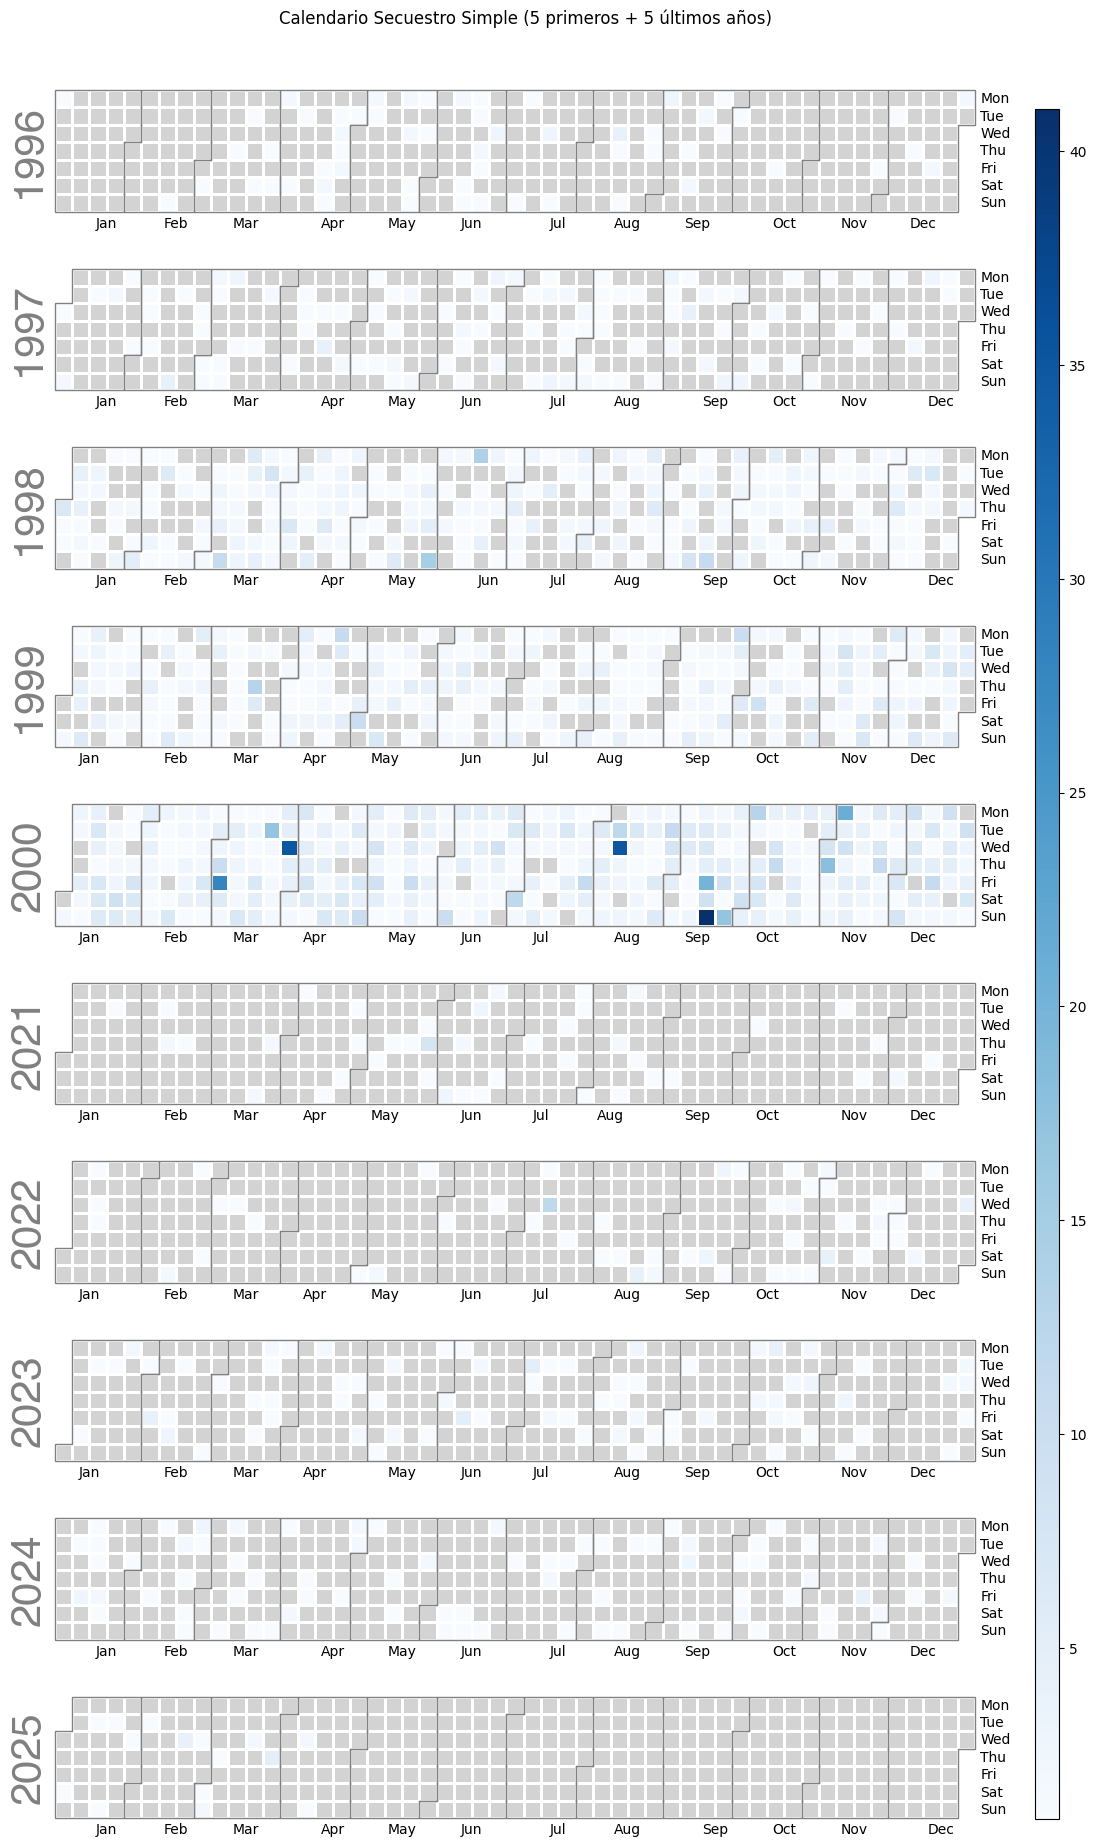

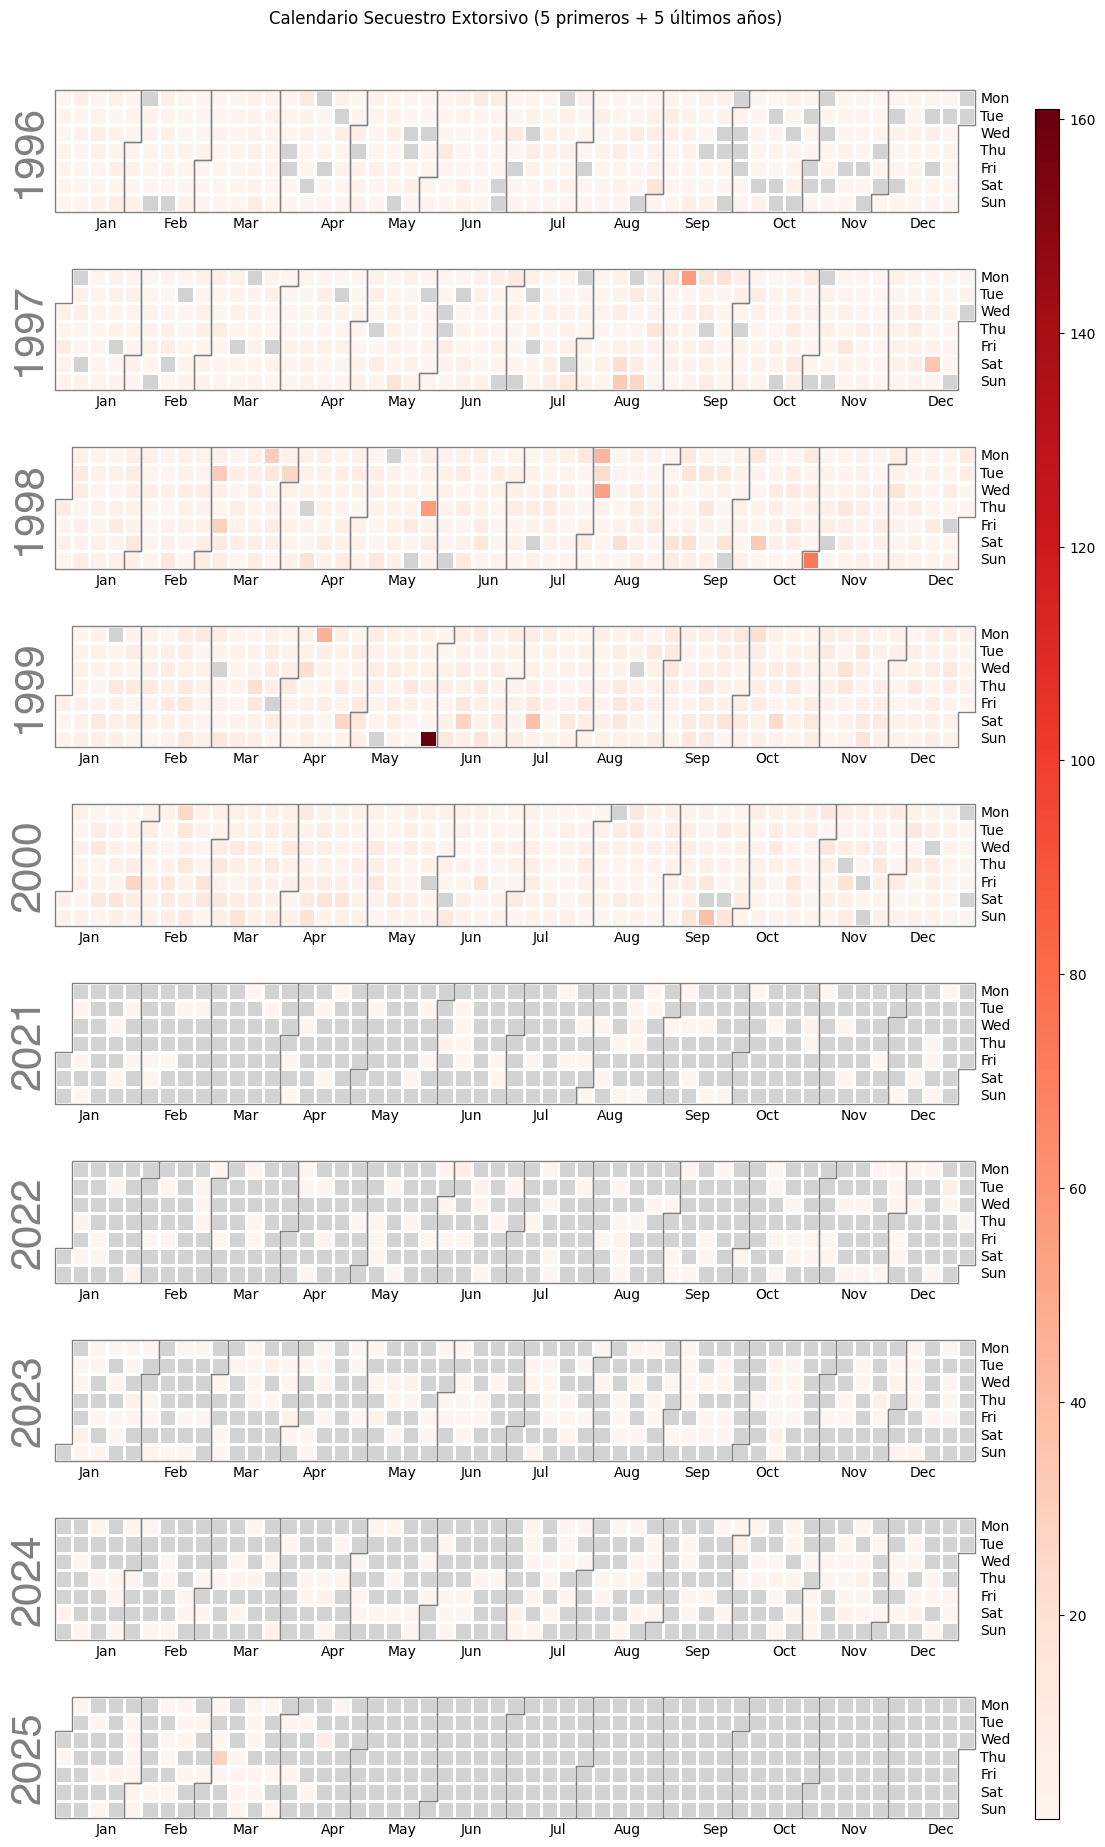

In [32]:


# Calendario para SECUESTRO SIMPLE
fig1, ax1 = calplot.calplot(
    serie_simple,
    cmap='Blues',
    suptitle='Calendario Secuestro Simple (5 primeros + 5 últimos años)',
    colorbar=True,
    how='sum',
    fillcolor='lightgray',
    figsize=(12, 18)
)
plt.show()

# Calendario para SECUESTRO EXTORSIVO
fig2, ax2 = calplot.calplot(
    serie_extorsivo,
    cmap='Reds',
    suptitle='Calendario Secuestro Extorsivo (5 primeros + 5 últimos años)',
    colorbar=True,
    how='sum',
    fillcolor='lightgray',
    figsize=(12, 18)
)
plt.show()


In [33]:
# Crear columna total de secuestros (simple + extorsivo)
DF_pivot['TOTAL SECUESTROS'] = DF_pivot['SECUESTRO EXTORSIVO'] + DF_pivot['SECUESTRO SIMPLE']

# Agrupar por municipio para obtener los 10 con más casos
top10_municipios = (
    DF_pivot.groupby('municipio')['TOTAL SECUESTROS']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtrar DF_pivot con solo los 10 municipios principales
df_top10 = DF_pivot[DF_pivot['municipio'].isin(top10_municipios)]

# Agrupar por municipio y año, sumando los secuestros
df_muni_agrupado = df_top10.groupby(['municipio', 'ano'])[['SECUESTRO EXTORSIVO', 'SECUESTRO SIMPLE']].sum()
df_muni_agrupado['TOTAL'] = df_muni_agrupado.sum(axis=1)
df_muni_agrupado = df_muni_agrupado.reset_index()


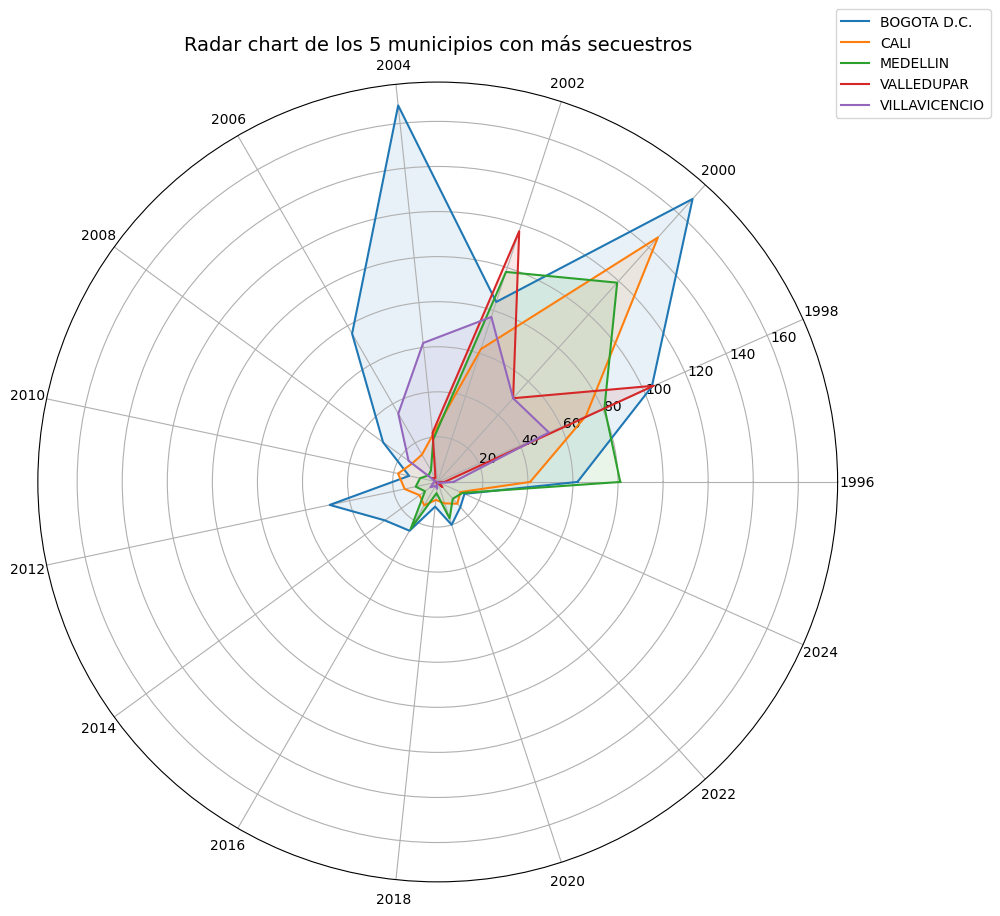

In [34]:
# Elegir años en intervalos (ej. cada 2 años)
años_intervalo = sorted(df_muni_agrupado['ano'].unique())
años_filtrados = [a for a in años_intervalo if a % 2 == 0]

# Crear tabla tipo matriz para radar (municipio × año)
df_radar = df_muni_agrupado[df_muni_agrupado['ano'].isin(años_filtrados)]
df_radar = df_radar.pivot(index='municipio', columns='ano', values='TOTAL').fillna(0)

# Asegurar que estén en orden los años
df_radar = df_radar[años_filtrados]


from math import pi
import matplotlib.pyplot as plt

# Preparar los ángulos
labels = df_radar.columns.astype(str)
n_labels = len(labels)
angles = [n / float(n_labels) * 2 * pi for n in range(n_labels)]
angles += angles[:1]  # cerrar la figura

# Crear figura
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Dibujar una línea por cada municipio
for i, row in df_radar.iterrows():
    valores = row.tolist() + [row.tolist()[0]]
    ax.plot(angles, valores, label=i)
    ax.fill(angles, valores, alpha=0.1)

# Configurar etiquetas del eje circular (años)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Título y leyenda
plt.title('Radar chart de los 5 municipios con más secuestros', size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


$Analisis$

<p style="text-align: justify;">
Este tipo de gráfico radar, nos ayuda a ver cómo ha cambiado el número de secuestros en los cinco municipios con más casos a lo largo del tiempo. Cada línea de color representa un municipio diferente. Los años están marcados en el círculo exterior, y los números al centro (20, 40, 60, etc.) indican la cantidad de secuestros. Podemos notar que la mayoría de estos municipios tuvieron un pico alto de secuestros a principios de los 2000, que como hemos mencionado en anteriores analisis corresponde a una epoca particular en Colombia donde el fenomeno de la violencia derivado del narcoterrorismo impactaba exponecialmente los casos, especialmente entre 2000 y 2004. Por ejemplo, Bogotá D.C. y Medellín muestran figuras más grandes en esos años, indicando más secuestros, evidentemente tienen una caracterización y es que son ciudades principales y por tanto más pobladas.
</p>
<p style="text-align: justify;">
Después de 2004, las líneas de todos los municipios se encogen notablemente hacia el centro del gráfico. Esto significa que la cantidad de secuestros disminuyó drásticamente en todos ellos. Desde aproximadamente 2008 en adelante, las figuras son mucho más pequeñas y cercanas al centro, lo que indica que los secuestros se han mantenido en niveles muy bajos y estables en estos municipios. En resumen, el gráfico muestra una reducción significativa y sostenida de los secuestros en estas ciudades principales.
</p>


In [35]:
# Crear columna total
DF_pivot['TOTAL SECUESTROS'] = DF_pivot['SECUESTRO SIMPLE'] + DF_pivot['SECUESTRO EXTORSIVO']

# Calcular total por departamento
top10_dptos = (
    DF_pivot.groupby('departamento')['TOTAL SECUESTROS']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filtrar solo los departamentos con más secuestros
df_top10 = DF_pivot[DF_pivot['departamento'].isin(top10_dptos)]

# Agrupar por año y departamento
df_stream = (
    df_top10.groupby(['ano', 'departamento'])['TOTAL SECUESTROS']
    .sum()
    .reset_index()
)


In [36]:
import plotly.express as px

fig = px.area(
    df_stream,
    x='ano',
    y='TOTAL SECUESTROS',
    color='departamento',
    line_group='departamento',
    title='Evolución de secuestros en los 10 departamentos con más casos',
    labels={'ano': 'Año', 'TOTAL SECUESTROS': 'Total Secuestros'}
)

# Estética adicional (opcional)
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Secuestros',
    legend_title='Departamento',
    template='plotly_dark'  # Usa 'plotly' para fondo blanco si prefieres
)

fig.show()


$Analisis$

<p style="text-align: justify;">
Esta gráfica nos muestra cómo han cambiado los secuestros a lo largo del tiempo en los 10 departamentos de Colombia con más casos. Cada color representa un departamento diferente, y las capas se van sumando para mostrar el total de secuestros en el país. Podemos ver que, en general, hubo un pico muy alto de secuestros alrededor del año 2000 y principios de los 2000. Durante esos años, departamentos como Antioquia y Valle del Cauca contribuían con una gran cantidad de casos, departamentos que historicamente han sido sede de los principales carteles de narcotrafico en el pais. A partir de 2005, se observa una disminución drástica y constante de los secuestros en todos los departamentos. Las capas se hacen mucho más delgadas, indicando que los números bajaron significativamente. Desde aproximadamente 2010 en adelante, la cantidad de secuestros se ha mantenido en niveles mucho más bajos y estables en todos los departamentos, aunque con pequeñas variaciones. Esto significa que la reducción del secuestro no fue solo en un lugar, sino una tendencia generalizada en los departamentos más afectados.
</p>

In [37]:

import geopandas as gpd


In [38]:
# Ruta al archivo shapefile (asegúrate de que estén todos los archivos .shp, .dbf, .shx, etc.)
ruta_shapefile = "/Users/mac/Library/CloudStorage/OneDrive-UniversidadExternadodeColombia/MINE/segundo semestre/Seminario/Mi_primer_proyecto/MGN2024_MPIO_POLITICO/MGN_ADM_MPIO_GRAFICO.shp"

# Cargar como GeoDataFrame
gdf_municipios = gpd.read_file(ruta_shapefile)


In [39]:
gdf_municipios['mpio_cdpmp'] = gdf_municipios['mpio_cdpmp'].astype(str).str.zfill(5)


(-82.48004081208016,
 -66.10279517021338,
 -5.110613177586695,
 14.275934472984828)

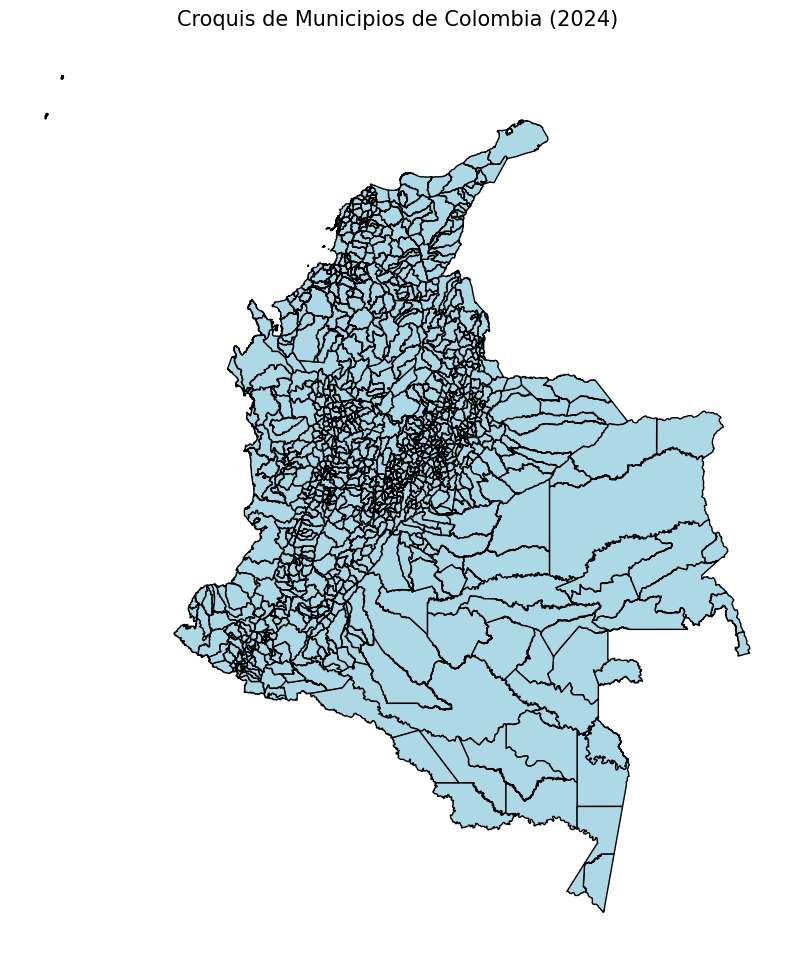

In [40]:
# Configurar tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 12))

# Dibujar el croquis de municipios
gdf_municipios.plot(ax=ax, edgecolor='black', color='lightblue')

# Título
ax.set_title("Croquis de Municipios de Colombia (2024)", fontsize=15)
plt.axis('off') 



In [41]:
# 1. Asegúrate de que la clave esté en formato correcto en ambos
DF_pivot['cod_muni'] = DF_pivot['key'].str[:5]  # extraer código de municipio

# 2. Asegura que el código del shapefile también esté como string de 5 dígitos
gdf_municipios['mpio_cdpmp'] = gdf_municipios['mpio_cdpmp'].astype(str).str.zfill(5)

# 3. Obtener años únicos
años = sorted(DF_pivot['ano'].unique())

In [42]:
# Agrupar por municipio
df_mapa = DF_pivot.groupby('cod_muni')[['SECUESTRO SIMPLE', 'SECUESTRO EXTORSIVO']].sum().reset_index()

# Asegurar cod_muni esté como string de 5 dígitos
df_mapa['cod_muni'] = df_mapa['cod_muni'].astype(str).str.zfill(5)


In [43]:
# Unir por código de municipio (cod_muni en df y mpio_cdpmp en shapefile)
gdf_merged = gdf_municipios.merge(df_mapa, left_on='mpio_cdpmp', right_on='cod_muni', how='left')

# Reemplazar NaN por 0
gdf_merged[['SECUESTRO SIMPLE', 'SECUESTRO EXTORSIVO']] = gdf_merged[['SECUESTRO SIMPLE', 'SECUESTRO EXTORSIVO']].fillna(0)


- VISUALIZACIÓN: MAPA COROPLÉTICO 

*(Secuestro simple y extorsivo)*

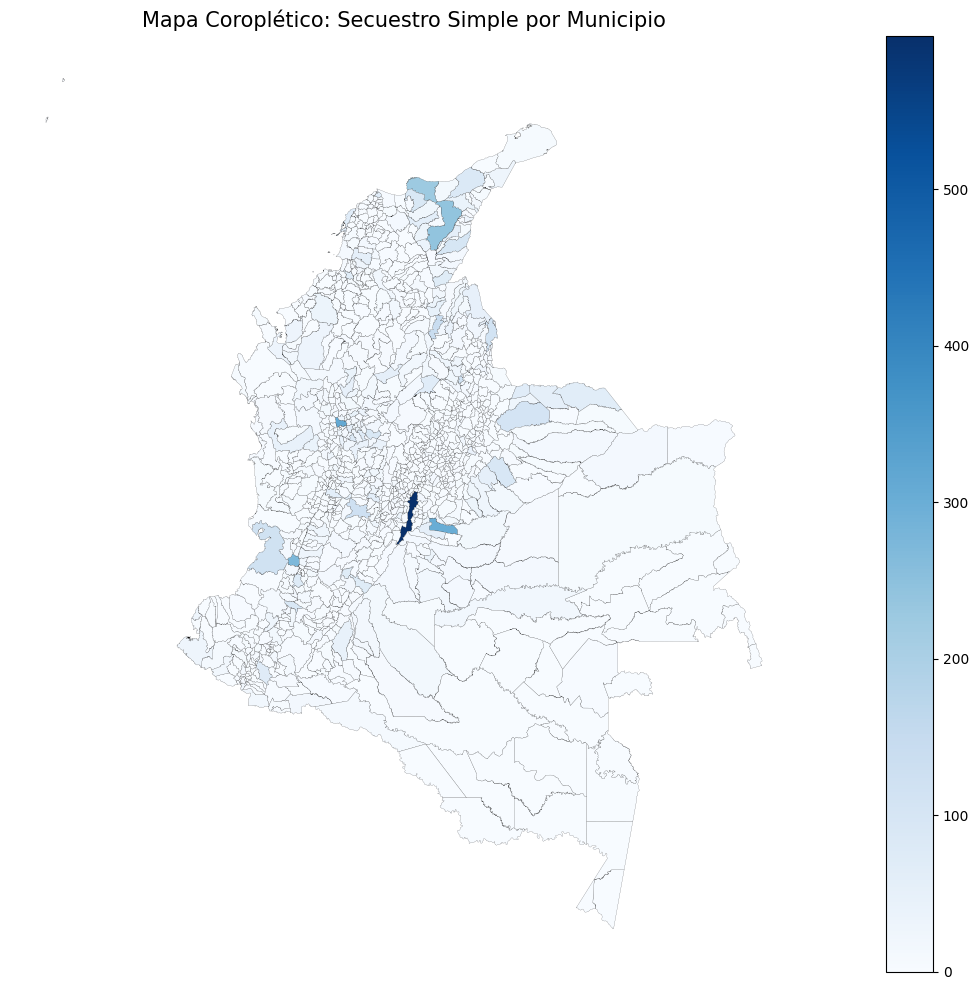

In [ ]:
import matplotlib.pyplot as plt

# --- Mapa de Secuestro Simple ---
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
gdf_merged.plot(
    column='SECUESTRO SIMPLE',
    cmap='Blues',
    linewidth=0.1,
    edgecolor='black',
    legend=True,
    ax=ax
)
ax.set_title('Mapa Coroplético: Secuestro Simple por Municipio', fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()




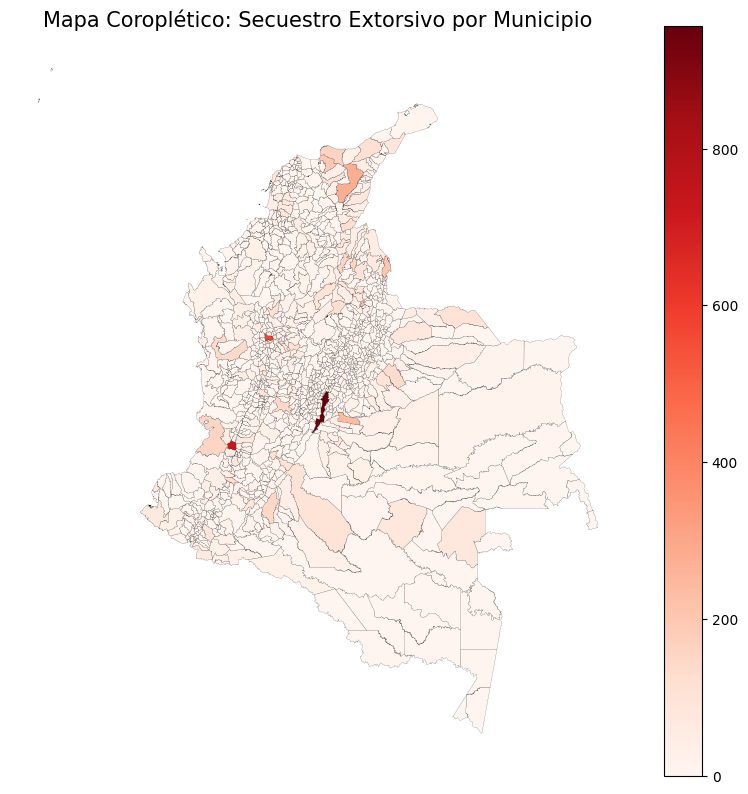

In [45]:
# --- Mapa de Secuestro Extorsivo ---
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
gdf_merged.plot(
    column='SECUESTRO EXTORSIVO',
    cmap='Reds',
    linewidth=0.1,
    edgecolor='black',
    legend=True,
    ax=ax
)
ax.set_title('Mapa Coroplético: Secuestro Extorsivo por Municipio', fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

In [46]:
DF_pivot.to_csv('DF_pivot.csv', index=False)
